<a href="https://colab.research.google.com/github/sureshk6026/Task-6-7-8/blob/main/Copy_of_Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
import seaborn as sns

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


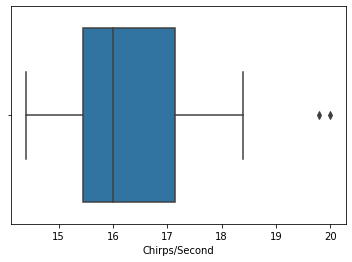

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(df['Chirps/Second'])
plt.show()

In [ ]:
df.rename(columns={'Chirps/Second':'Chirps'},inplace=True)
df

,Chirps,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
iqr = df.Chirps.quantile(0.75)-df.Chirps.quantile(0.25)
upper_threshold=df.Chirps.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Chirps.quantile(0.25)+(1.5*iqr)
print(lower_threshold)
print(upper_threshold)

18.0
19.699999999999996


In [ ]:
df.isnull().sum()

Chirps                0
Ground Temperature    0
dtype: int64

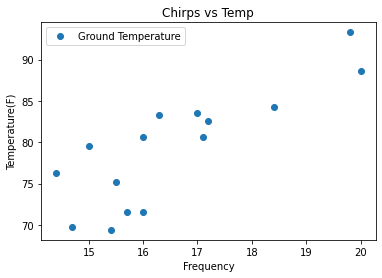

In [ ]:
df.plot(x='Chirps',y='Ground Temperature',style='o')
plt.title('Chirps vs Temp')
plt.xlabel('Frequency')
plt.ylabel('Temperature(F)')
plt.show()

In [ ]:
df.corr()

,Chirps,Ground Temperature
Chirps,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
X=df.loc[:,['Chirps']].values
Y=df.loc[:,'Ground Temperature'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=6)

In [ ]:
Y_test

array([82.6, 83.5, 69.7])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

26.38440093828938


In [ ]:
print(regressor.coef_)

[3.1953266]


In [ ]:
regressor.predict([[15]])

array([74.31429989])

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([81.3440184 , 80.70495309, 73.35570191])

In [ ]:
df=pd.DataFrame({'Actual': Y_test ,'Predicted': y_pred})
df

,Actual,Predicted
0,82.6,81.344018
1,83.5,80.704953
2,69.7,73.355702


In [ ]:
regressor.predict([[18]])

array([83.90027968])

In [ ]:
regressor.predict([[21.4738]])

array([95.00020521])

In [ ]:
from sklearn import metrics
print('R2 - SCORE:' , metrics.r2_score (Y_test, y_pred))

R2 - SCORE: 0.8091433191110395


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [3]:
import pandas as pd

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_fwf("/content/brain_body.txt")

In [ ]:
df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [7]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


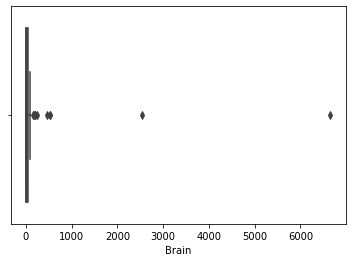

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(df['Brain'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


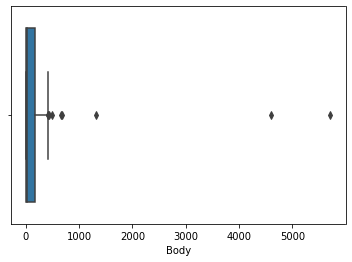

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(df['Body'])
plt.show()

In [13]:
iqr=df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold=df.Brain.quantile(0.75)+(1.5*iqr)
lower_threshold=df.Brain.quantile(0.25)+(1.5*iqr)
print(lower_threshold)
print(upper_threshold)

72.00375
119.60625


In [14]:
df.isnull().sum()
df.head()


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [15]:
df= df.drop_duplicates()
df.shape

(62, 2)

In [16]:
df.dtypes

Brain    float64
Body     float64
dtype: object

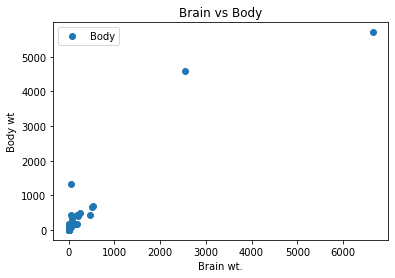

In [17]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain wt.')
plt.ylabel('Body wt')
plt.show()

In [18]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [19]:
df.Brain.values

array([3.385e+00, 4.800e-01, 1.350e+00, 4.650e+02, 3.633e+01, 2.766e+01,
       1.483e+01, 1.040e+00, 4.190e+00, 4.250e-01, 1.010e-01, 9.200e-01,
       1.000e+00, 5.000e-03, 6.000e-02, 3.500e+00, 2.000e+00, 1.700e+00,
       2.547e+03, 2.300e-02, 1.871e+02, 5.210e+02, 7.850e-01, 1.000e+01,
       3.300e+00, 2.000e-01, 1.410e+00, 5.290e+02, 2.070e+02, 8.500e+01,
       7.500e-01, 6.200e+01, 6.654e+03, 3.500e+00, 6.800e+00, 3.500e+01,
       4.050e+00, 1.200e-01, 2.300e-02, 1.000e-02, 1.400e+00, 2.500e+02,
       2.500e+00, 5.550e+01, 1.000e+02, 5.216e+01, 1.055e+01, 5.500e-01,
       6.000e+01, 3.600e+00, 4.288e+00, 2.800e-01, 7.500e-02, 1.220e-01,
       4.800e-02, 1.920e+02, 3.000e+00, 1.600e+02, 9.000e-01, 1.620e+00,
       1.040e-01, 4.235e+00])

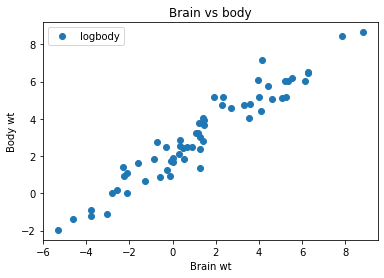

,logbrain,logbody
logbrain,1.000000,0.959575
logbody,0.959575,1.000000


In [20]:
import numpy as np
df['logbrain'] = np.log(df["Brain"])
df['logbody']=np.log(df['Body'])
df.plot(x='logbrain',y='logbody',style='o')
plt.title('Brain vs body')
plt.xlabel('Brain wt')
plt.ylabel('Body wt')
plt.show()
df[['logbrain','logbody']].corr()


In [21]:
df.head()

,Brain,Body,logbrain,logbody
0,3.385,44.5,1.219354,3.795489
1,0.480,15.5,-0.733969,2.740840
2,1.350,8.1,0.300105,2.091864
3,465.000,423.0,6.142037,6.047372
4,36.330,119.5,3.592644,4.783316


In [22]:
X=df[['logbrain']].values
y=df['logbody'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=80)

In [24]:
y_test

array([ 1.36097655,  3.24259235,  6.48463524,  5.05624581,  4.39444915,
       -1.38629436,  7.18538702])

In [25]:
X_train.shape, X_test.shape

((55, 1), (7, 1))

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
print(regressor.intercept_)

2.158838121591312


In [28]:
print(regressor.intercept_)

2.158838121591312


In [29]:
print(regressor.coef_)


[0.75175075]


In [30]:
regressor.predict([[0]])

array([2.15883812])

In [32]:
y_pred=regressor.predict(X_test)

In [33]:
from sklearn import metrics
print('R2-SCORE',metrics.r2_score(y_test,y_pred))

R2-SCORE 0.852273299989046


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [35]:
df = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [36]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [37]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [38]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [39]:
df.groupby('Sex')['Salary'].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

In [40]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


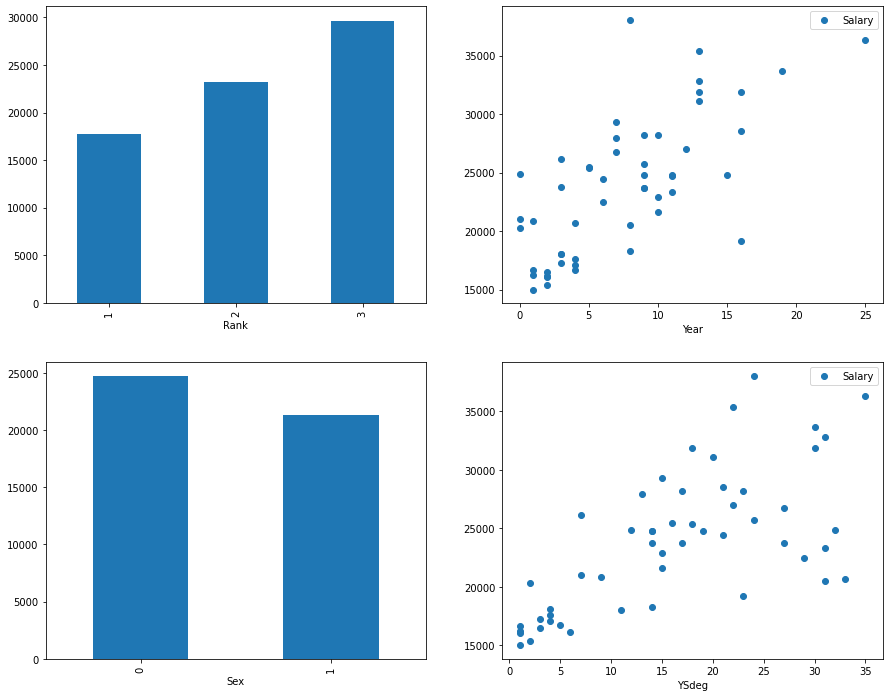

In [43]:
fig,axarr=plt.subplots(2,2,figsize=(15,12))
df.groupby('Rank')['Salary'].mean().plot(kind='bar',ax=axarr[0][0])
df.plot(x='Year',y='Salary',style='o',ax=axarr[0][1])
df.groupby('Sex')['Salary'].mean().plot(kind='bar',ax=axarr[1][0])
df.plot(x='YSdeg',y='Salary',style='o',ax=axarr[1][1])
plt.show()

In [47]:
salary_discrim_cols=["Sex",'Rank','Year','Degree',"YSdeg"]

In [52]:
from sklearn import linear_model
import itertools as it

In [48]:
def lin_reg(salary_discrim_cols,df):
  input_cols=df[salary_discrim_cols]
  salary=df['Salary']
  regr_sd=linear_model.LinearRegression()
  regr_sd.fit(input_cols,salary)
  print('The equation' '{}+{}'.format(salary_discrim_cols,regr_sd.coef_,regr_sd.intercept_))

In [53]:
lin_reg(salary_discrim_cols,df)

The equation['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']+[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]


In [54]:
def lin_reg_focus(salary_discrim_cols,df,focus="Salary"):
  input_cols=df[salary_discrim_cols]
  focus_output=df[focus]
  regr_sd=linear_model.LinearRegression()
  regr_sd.fit(input_cols,focus_output)
  return regr_sd.score(input_cols,focus_output)

In [55]:
lin_reg_focus(salary_discrim_cols,df)

0.8547180674410969

In [56]:
def get_combos(cols):
  return [it.combinations(cols,n+1) for n in range(len(cols))]

In [60]:
num_by_sex=df.Sex.value_counts()
print("total men", num_by_sex[0])
print("total women", num_by_sex[1])

total men 38
total women 14


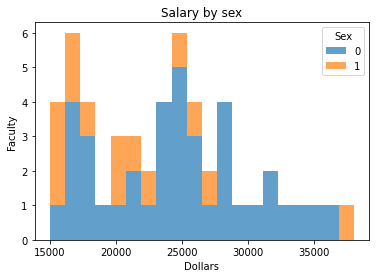

In [61]:
df.pivot_table(index=df.index,columns="Sex",values='Salary')\
    .plot(kind='hist',alpha=0.7,stacked=True,bins=20,title='Salary by sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

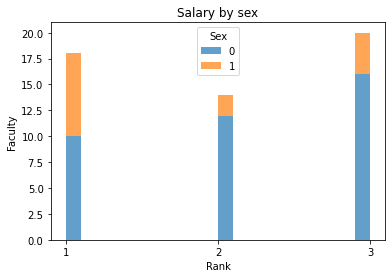

In [62]:
df.pivot_table(index=df.index,columns="Sex",values='Rank')\
    .plot(kind='hist',alpha=0.7,stacked=True,bins=20,title='Salary by sex')
plt.xticks([1,2,3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

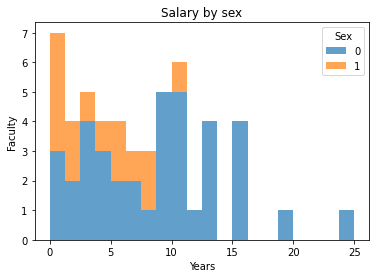

In [63]:
df.pivot_table(index=df.index,columns="Sex",values='Year')\
    .plot(kind='hist',alpha=0.7,stacked=True,bins=20,title='Salary by sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

In [64]:
df=df[df['Year']<=10]

In [68]:
def all_combo_scores(combos,df,focus='Salary'):
  combo_scores={}
  for m in range(len(list(combos))):
    for n in list(combos[m]):
      combo_scores[lin_reg_focus(list(n),df,focus)]=n
    return combo_scores


In [70]:
combos=get_combos(salary_discrim_cols)

In [71]:
combo_scores=all_combo_scores(combos,df)
sorted(combo_scores.items(),key=lambda c:c[0],reverse=True)

[(0.7221603677648399, ('Rank',)),
 (0.38329194186217797, ('YSdeg',)),
 (0.32534791979498534, ('Year',)),
 (0.01327225187005543, ('Degree',)),
 (0.006877700561349731, ('Sex',))]